In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel(r"C:\Users\moizr\Downloads\archive (5)\Kids Show most Viewed .xlsx")

In [4]:
df

,Channel,Episode title,Series,Total Live Viewers,Release Year
0,Cartoon Network,Magic Ball of Buu,Dragon Ball Z,3649000,2001
1,Cartoon Network,Gather for the Tournament,Dragon Ball Z,3624000,2001
2,Cartoon Network,The Losses Begin,Dragon Ball Z,3510000,2001
3,Cartoon Network,Vegeta's Pride,Dragon Ball Z,3389000,2001
4,Cartoon Network,The Terror of Majin Buu,Dragon Ball Z,3349000,2001
5,Cartoon Network,Meal Time,Dragon Ball Z,3283000,2001
6,Cartoon Network,The Last of Mercenary Tao,Dragon Ball Z,3806000,2002
7,Cartoon Network,Race Against Time,Ben 10: Race Against Time,3987000,2007
8,Cartoon Network,Ambush,Star Wars: The Clone Wars,3991000,2008
9,Cartoon Network,Rising Malevolence,Star Wars: The Clone Wars,3924000,2008


### Is there any Null value present in any Column ?
Show with heatmap

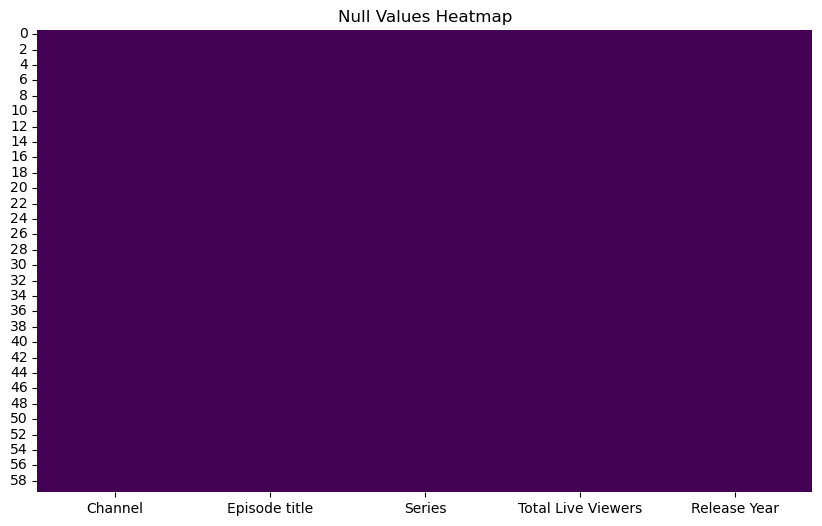

In [5]:
null_values = df.isnull()

# Visualize null values with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(null_values, cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

## Question 1: Top channels with highest average total viewers

In [7]:

# Group by channel name and calculate the average total viewers
average_viewers = df.groupby('Channel')['Total Live Viewers'].mean()

# Sort the channels based on their average total viewers in descending order
top_channels = average_viewers.sort_values(ascending=False)

# Display the top channels with the highest average total viewers
print("Top channels with highest average total viewers:")
print(top_channels)

Top channels with highest average total viewers:
Channel
Nickelodeon        8284300.0
Disney             7690000.0
Cartoon Network    3801150.0
Name: Total Live Viewers, dtype: float64


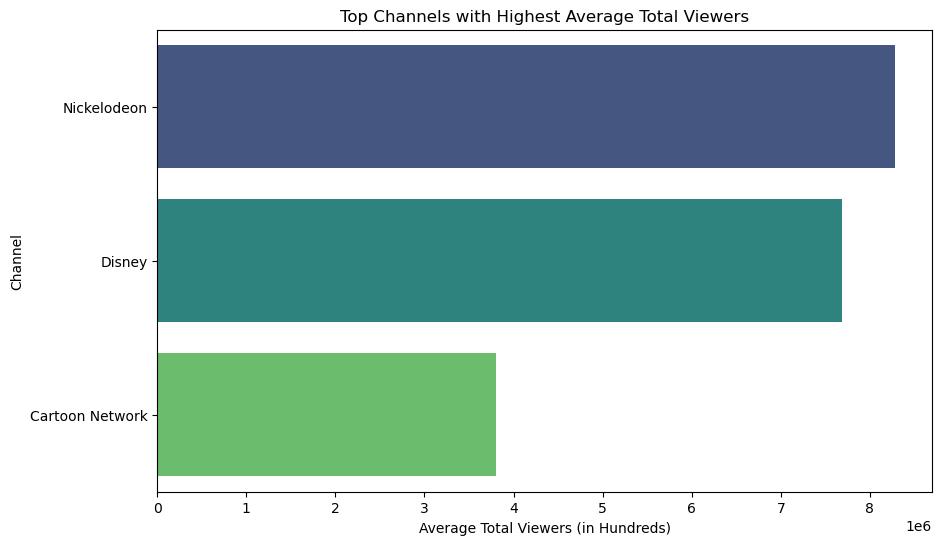

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")
plt.xlabel("Average Total Viewers (in Hundreds)")
plt.ylabel("Channel")
plt.title("Top Channels with Highest Average Total Viewers")
plt.show()

## Question 2: Episode or series with highest total viewes


In [10]:
highest_viewers = df.sort_values(by='Total Live Viewers', ascending=False)

# Select the top row (episode or series with highest total viewers)
highest_viewers_episode = highest_viewers.iloc[0]
highest_viewers_episode

Channel                 Nickelodeon
Episode title         All Growed Up
Series                      Rugrats
Total Live Viewers         11913000
Release Year                   2001
Name: 40, dtype: object

## Question 3: Correlation between release year and total viewership

In [13]:
correlation = df['Release Year'].corr(df['Total Live Viewers'])
correlation*100

10.72622245178247

### Question 4: Distribution of total viewership across channels

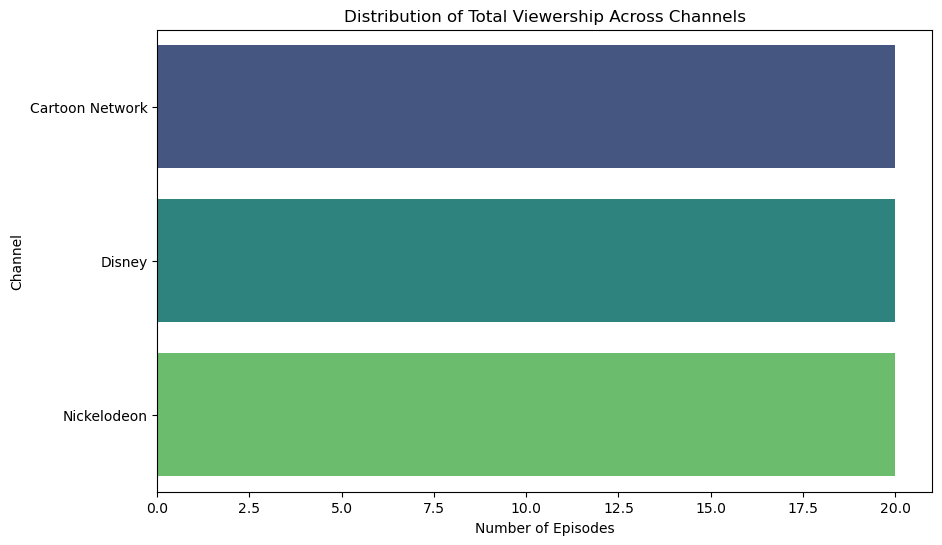

In [21]:
channel_distribution = df['Channel'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(y="Channel", data=df, palette="viridis")
plt.xlabel("Number of Episodes")
plt.ylabel("Channel")
plt.title("Distribution of Total Viewership Across Channels")
plt.show()

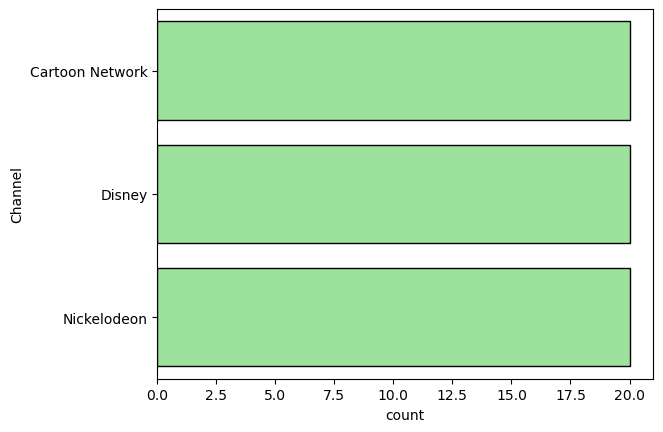

In [23]:
sns.countplot(data=df, y='Channel', color='lightgreen', edgecolor='black')
plt.show()

# Question 5: Trends in total viewership over the years

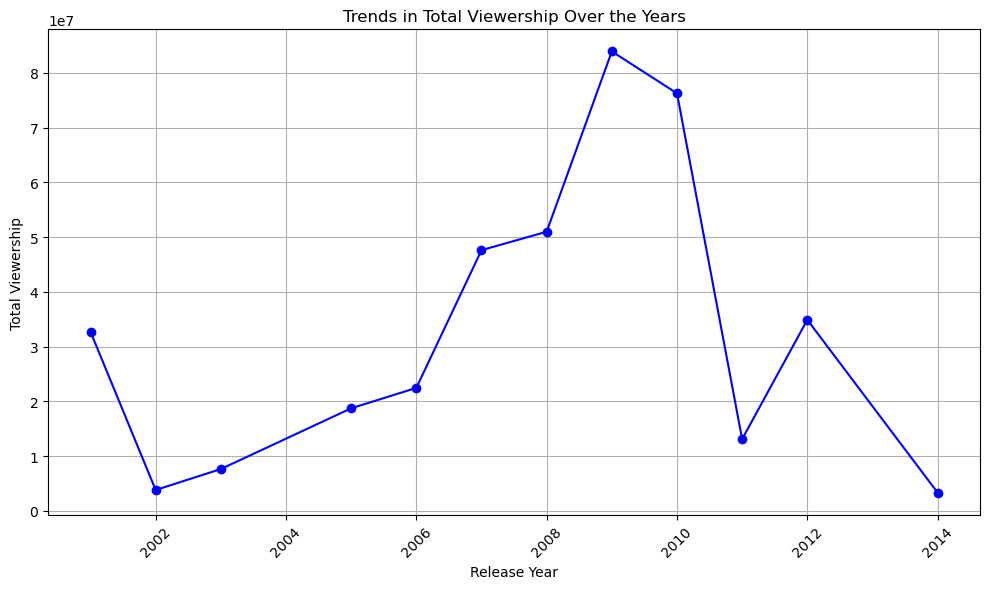

In [27]:
# Group the data by release year and calculate the total viewership for each year
yearly_viewership = df.groupby('Release Year')['Total Live Viewers'].sum()

# Plot the trends in total viewership over the years
plt.figure(figsize=(10, 6))
yearly_viewership.plot(marker='o', color='blue')
plt.title('Trends in Total Viewership Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Total Viewership')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 6: Most popular series among kids based on total viewers

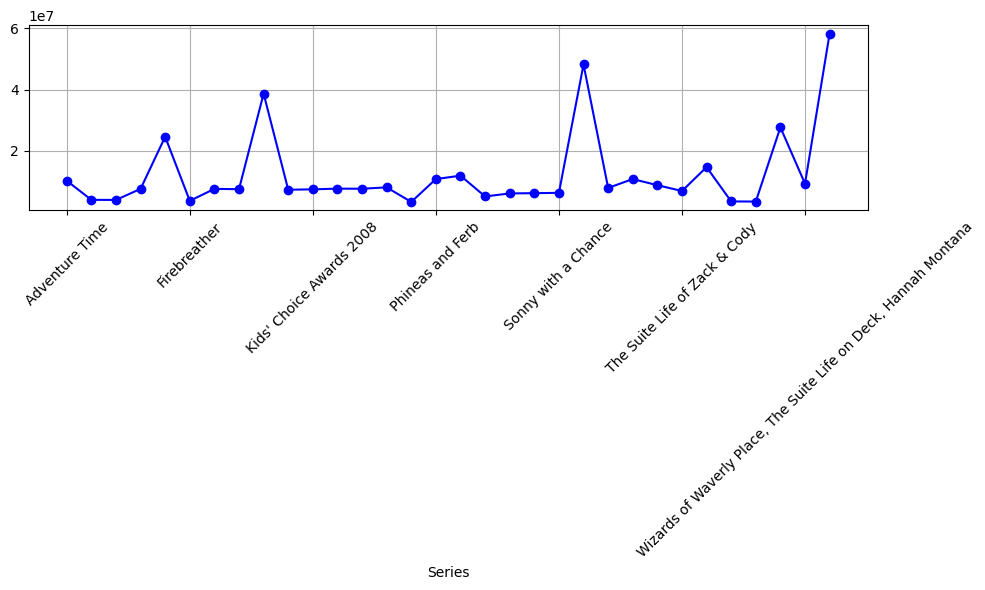

In [28]:
# Group the data by release year and calculate the total viewership for each year
yearly_viewership = df.groupby('Series')['Total Live Viewers'].sum()

# Plot the trends in total viewership over the years
plt.figure(figsize=(10, 6))
yearly_viewership.plot(marker='o', color='blue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

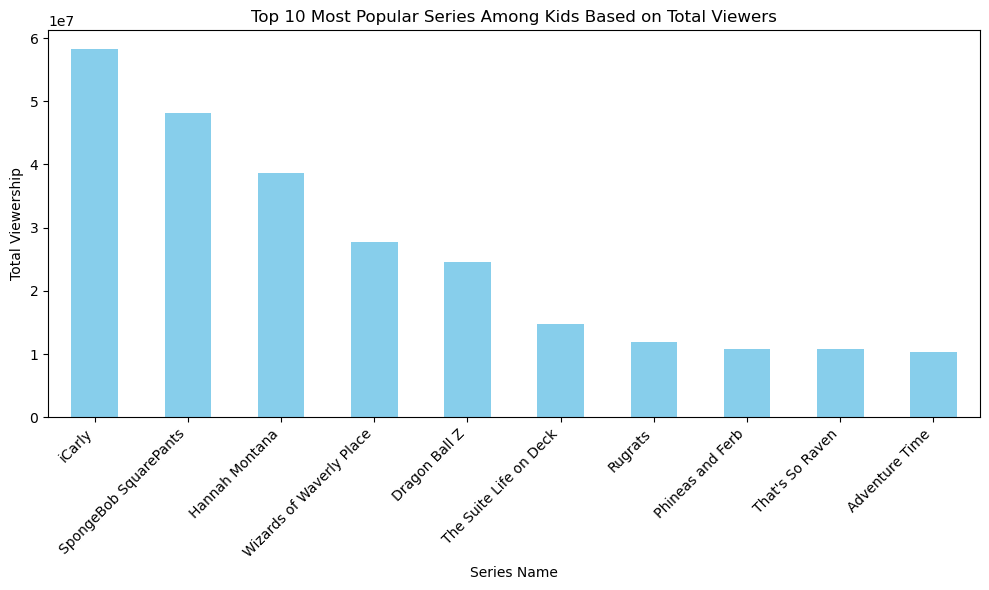

In [33]:
# Group by series name and sum up the total viewership for each series
series_viewership = df.groupby('Series')['Total Live Viewers'].sum()

# Sort the series based on total viewership in descending order
most_popular_series = series_viewership.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
most_popular_series.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Series Among Kids Based on Total Viewers')
plt.xlabel('Series Name')
plt.ylabel('Total Viewership')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

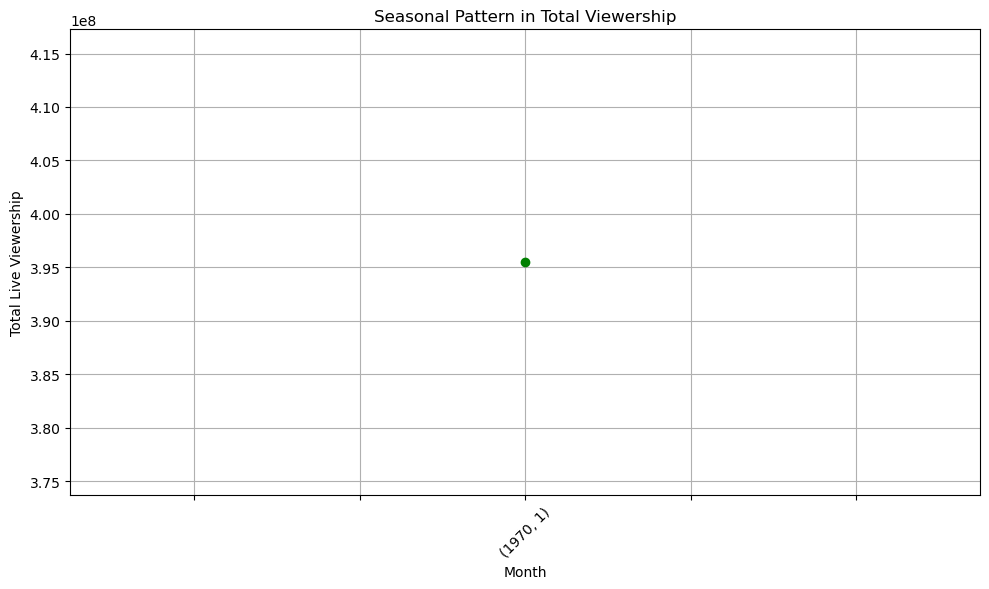

In [35]:
# Convert 'Release Date' column to datetime dtype
df['Release Year'] = pd.to_datetime(df['Release Year'])

# Extract month and year from 'Release Date'
df['Month'] = df['Release Year'].dt.month
df['Year'] = df['Release Year'].dt.year

# Group by month and year, and calculate total viewership
monthly_viewership = df.groupby(['Year', 'Month'])['Total Live Viewers'].sum()

# Plotting the seasonal pattern in total viewership
plt.figure(figsize=(10, 6))
monthly_viewership.plot(marker='o', color='green')
plt.title('Seasonal Pattern in Total Viewership')
plt.xlabel('Month')
plt.ylabel('Total Live Viewership')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

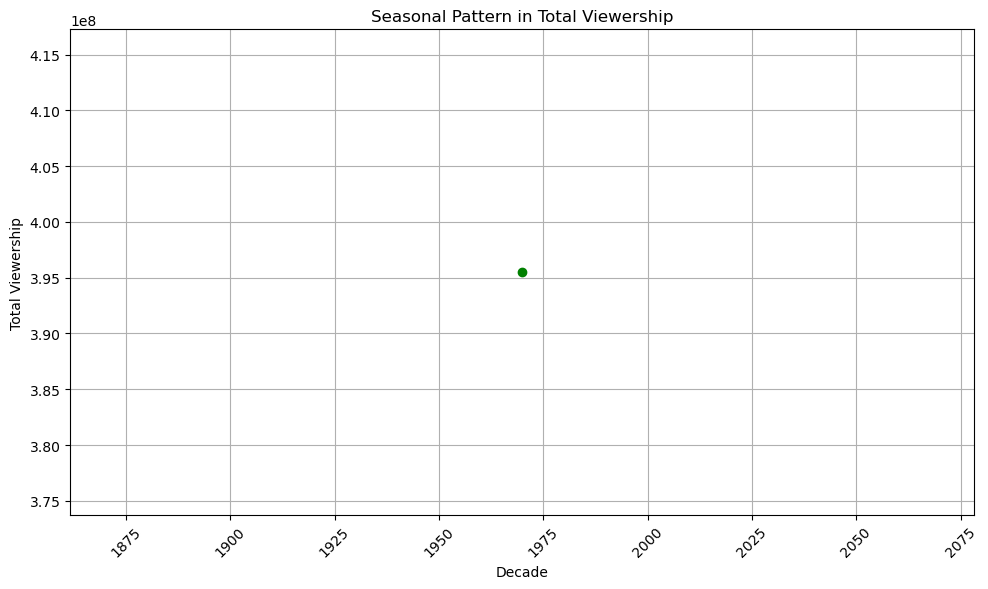

In [40]:
# Extract year from the datetime column
df['Year'] = df['Release Year'].dt.year

# Group by decade and calculate total viewership
seasonal_pattern = df.groupby(df['Year'] // 10 * 10)['Total Live Viewers'].sum()

# Plot the seasonal pattern in total viewership
plt.figure(figsize=(10, 6))
seasonal_pattern.plot(marker='o', color='g')
plt.title('Seasonal Pattern in Total Viewership')
plt.xlabel('Decade')
plt.ylabel('Total Viewership')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
